In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
image = cv2.imread('img1.jpg',0)
image = cv2.resize(image,(800,800))

In [18]:
 # Robertsedge operator
kernel_Roberts_x = np.array([
    [1, 0],
    [0, -1]
    ])
kernel_Roberts_y = np.array([
    [0, -1],
    [1, 0]
    ])

In [19]:
# Sobel edge operator
kernel_Sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]])
kernel_Sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]])

In [20]:
# Prewitt edge operator
kernel_Prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]])
kernel_Prewitt_y = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]])

In [21]:
# Kirsch edge detection operator
def kirsch(image):
    m,n = image.shape
    list=[]
    kirsch = np.zeros((m,n))
    for i in range(2,m-1):
        for j in range(2,n-1):
            d1 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d3 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d4 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                  3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d5 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] - 3
                  * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                  5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d7 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d8 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                  5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                  3 * image[i + 1, j] - 3 * image[i + 1, j + 1])

                         # : Take the maximum value in each direction, the effect is not good, use another method
            list=[d1, d2, d3, d4, d5, d6, d7, d8]
            kirsch[i,j]= int(np.sqrt(max(list)))
                         # : Rounding the die length in all directions
            #kirsch[i, j] =int(np.sqrt(d1+d2+d3+d4+d5+d6+d7+d8))
    for i in range(m):
        for j in range(n):
            if kirsch[i,j]>127:
                kirsch[i,j]=255
            else:
                kirsch[i,j]=0
    return kirsch


In [22]:
# CannyEdge Detection k is the Gaussian kernel size, t1, t2 is the threshold size
def Canny(image,k,t1,t2):
    img = cv2.GaussianBlur(image, (k, k), 0)
    canny = cv2.Canny(img, t1, t2)
    return canny

In [23]:
# 
kernel_Laplacian_1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])
kernel_Laplacian_2 = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]])

In [24]:
 # Two convolution kernels do not have rotation invariance
kernel_Laplacian_3 = np.array([
    [2, -1, 2],
    [-1, -4, -1],
    [2, 1, 2]])
kernel_Laplacian_4 = np.array([
    [-1, 2, -1],
    [2, -4, 2],
    [-1, 2, -1]])

In [25]:
 # 5*5 LoG Convolution Template
kernel_LoG = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]])

In [26]:
 # convolution

output_1 = cv2.filter2D(image, -1, kernel_Prewitt_x)
output_2 = cv2.filter2D(image, -1, kernel_Sobel_x)
output_3 = cv2.filter2D(image, -1, kernel_Prewitt_x)
output_4 = cv2.filter2D(image, -1, kernel_Laplacian_1)
output_5 = Canny(image,3,50,150)
output_6 = kirsch(image)

(Text(0.5, 1.0, 'Robert Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

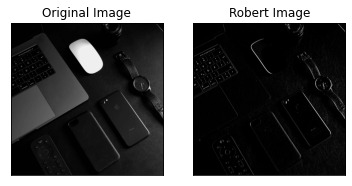

In [30]:
# Show sharpening effect
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_1,cmap = 'gray')
plt.title('Robert Image'), plt.xticks([]), plt.yticks([])






(Text(0.5, 1.0, 'Sobel Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

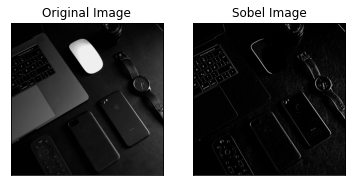

In [31]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_2,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Prewitt Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

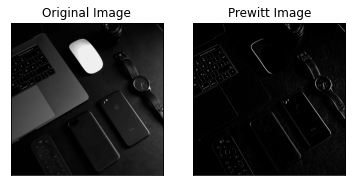

In [32]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_3,cmap = 'gray')
plt.title('Prewitt Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Kirsch Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

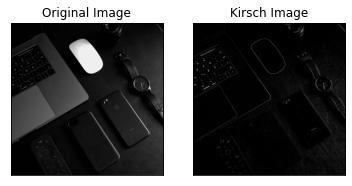

In [33]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_4,cmap = 'gray')
plt.title('Kirsch Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

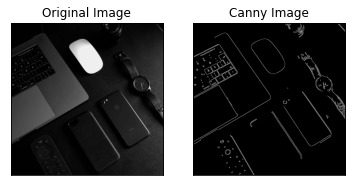

In [34]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_5,cmap = 'gray')
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Laplacian Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

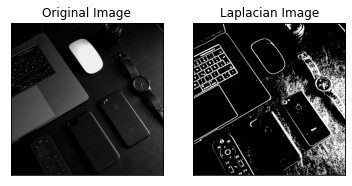

In [35]:
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_6,cmap = 'gray')
plt.title('Laplacian Image'), plt.xticks([]), plt.yticks([])